In [304]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from itertools import combinations


%matplotlib inline

plt.style.use('ggplot')

In [280]:
df_import = pd.read_csv('Provider_Info.csv')
df_import.head()

,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,Provider SSA County Code,Provider County Name,Ownership Type,...,Rating Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Processing Date
0,015019,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,P O BOX 130,ELMORE,AL,36025,3345678484,250,Elmore,For profit - Corporation,...,16,291.667,1,2,1,78677.0,0,1,130 ELMORE AL 36025,08/01/2019
1,015075,SUMMERFORD NURSING HOME INC,4087 HIGHWAY 31 SOUTHWEST,FALKVILLE,AL,35622,2567845275,510,Morgan,For profit - Corporation,...,401,72.167,0,1,1,13408.0,0,1,"4087 HIGHWAY FALKVILLE, AL 35622",08/01/2019
2,015124,CLAY COUNTY NURSING HOME,83825 HIGHWAY 9 P O BOX 1270,ASHLAND,AL,36251,2563542131,130,Clay,Non profit - Other,...,20,20.667,0,0,0,0.0,0,0,"83825 HIGHWAY ASHLAND, AL 36251",08/01/2019
3,015138,HENDRIX HEALTH AND REHABILITATION,1000 HIGHWAY 33,DOUBLE SPRINGS,AL,35553,2054892136,660,Winston,For profit - Corporation,...,44,18.667,0,0,0,0.0,0,0,"1000 HIGHWAY DOUBLE SPRINGS, AL 35553",08/01/2019
4,015142,"LINEVILLE HEALTH AND REHABILITATION, LLC",88073 HIGHWAY 9,LINEVILLE,AL,36266,2563962104,130,Clay,For profit - Corporation,...,24,14.000,0,0,0,0.0,0,0,"88073 HIGHWAY LINEVILLE, AL 36266",08/01/2019


### About the Dataset

In [151]:
#When data was processed/published
print('Published {}'.format(df_import['Processing Date'].unique()))

#Amount of features in the dataset
row_count = len(df_import.axes[0])
col_count = len(df_import.axes[1])
print('{} entries'.format(row_count))
print('{} features'. format(col_count))

Published ['08/01/2019']
15512 entries
85 features


In [201]:
df_import.info()
#Know there are nulls, make sure to look at later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15512 entries, 0 to 15511
Data columns (total 85 columns):
Federal Provider Number                                            15512 non-null object
Provider Name                                                      15512 non-null object
Provider Address                                                   15512 non-null object
Provider City                                                      15512 non-null object
Provider State                                                     15512 non-null object
Provider Zip Code                                                  15512 non-null int64
Provider Phone Number                                              15512 non-null int64
Provider SSA County Code                                           15512 non-null int64
Provider County Name                                               15512 non-null object
Ownership Type                                                     15512 non-null object
Numb

In [153]:
#Figure out column names
keys = []
for idx, column in enumerate(list(df_import.columns)):
    keys.append(column)
    #print (column)
    


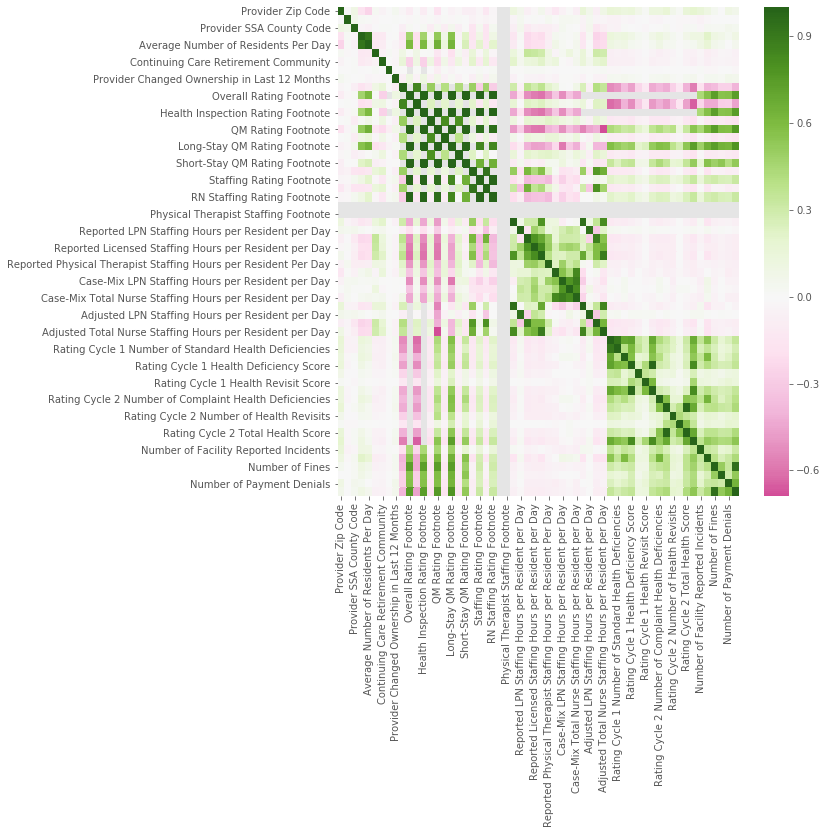

In [287]:
plt.figure(figsize=(9,9))
sns.heatmap(df_import.corr(), cmap="PiYG", annot=False, center=0);

### Conclusion about database contents

Most data to analyze is based on three factors: 

1. Quality Management
2. Health Inspection
3. Staffing

Break data down by factors by creating databases based just on those factors.
    

### QM Ratings Breakdown

In [251]:
#Create a new database with only QM ratings

QM_cols = [i for i in list(df_import.columns) if 'QM' in i]
#print(QM_cols)
QM_df = df_import.loc[:, ['Provider Name','QM Rating']]
QM_df.head(5)

,Provider Name,QM Rating
0,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,1.0
1,SUMMERFORD NURSING HOME INC,3.0
2,CLAY COUNTY NURSING HOME,5.0
3,HENDRIX HEALTH AND REHABILITATION,4.0
4,"LINEVILLE HEALTH AND REHABILITATION, LLC",4.0


/home/lea/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/lea/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


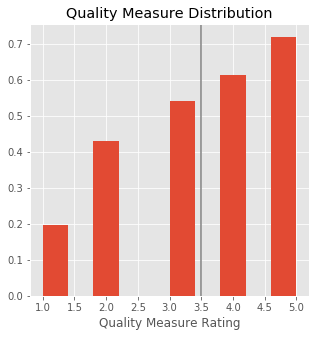

In [204]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Quality Measure Distribution')
ax.hist(merged_df['QM Rating'], density=True)
ax.set_xlabel('Quality Measure Rating')
ax.axvline(np.mean(merged_df['QM Rating']), color='grey')


### Staffing Breakdown

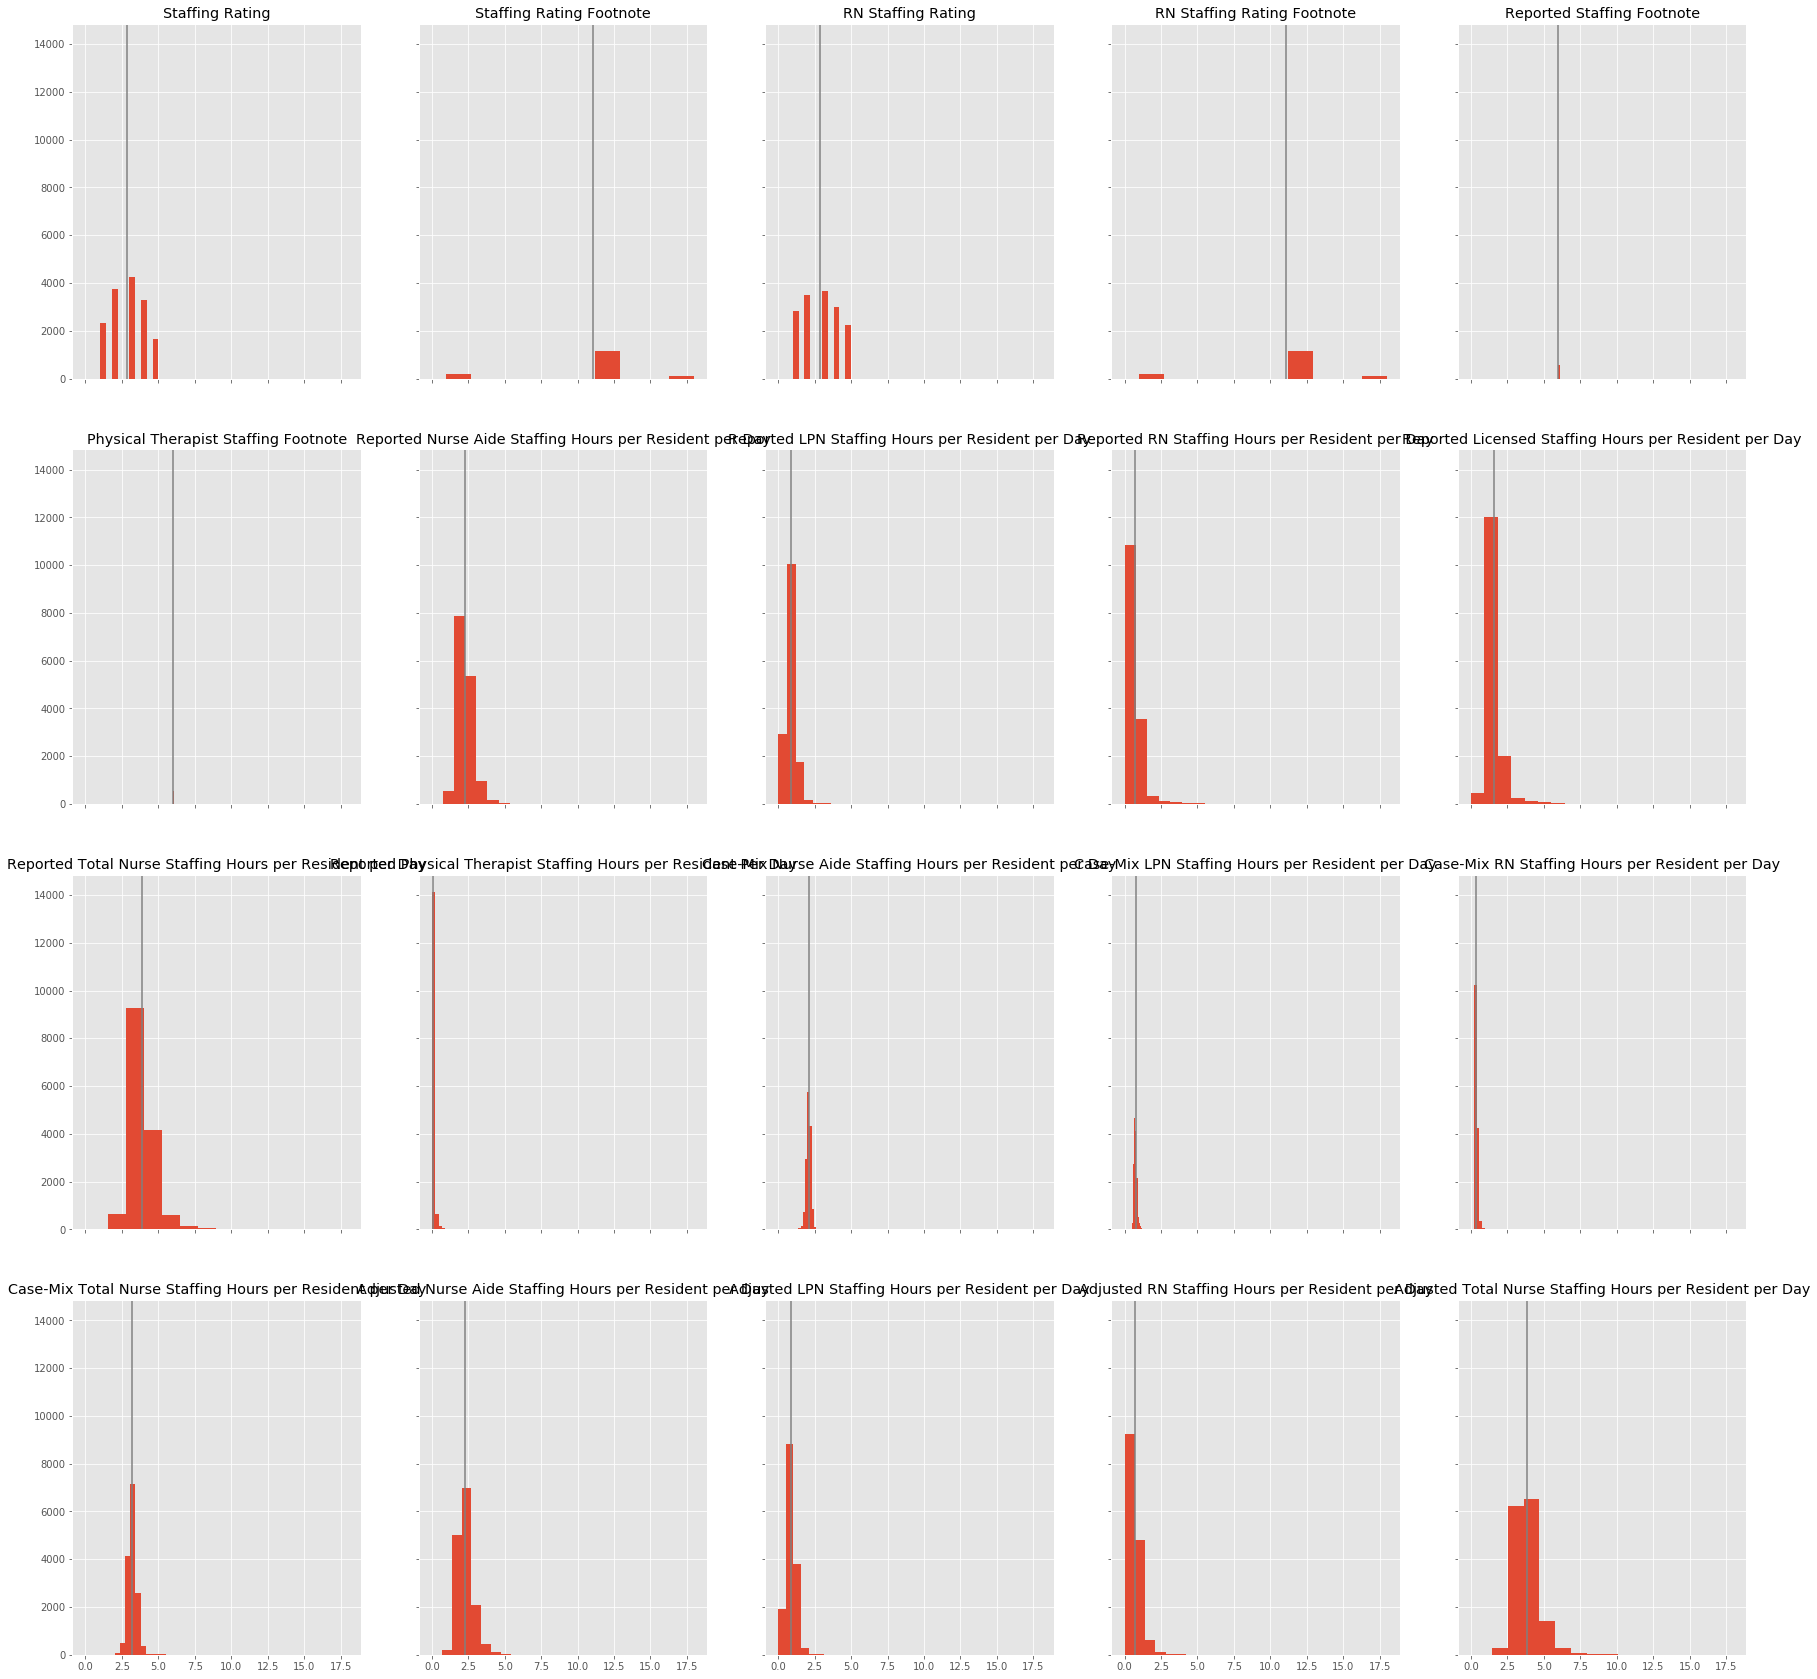

In [319]:
fig, axs = plt.subplots(4,5, figsize=(30,30), sharex=True, sharey=True)
keys = []
staffing_cols = [i for i in list(df_import.columns) if 'Staffing' in i]
staffing_df = df_import.loc[:,  df_import.columns.isin(staffing_cols)]
for i in range(4):
    for j in range(5):
        keys.append((i,j))

for idx, staff in zip(keys,staffing_cols):
        cols = staffing_df[staff]
        axs[idx[0]][idx[1]].set_title(staff)
        axs[idx[0]][idx[1]].hist(cols)
        axs[idx[0]][idx[1]].axvline(np.mean(cols), color='grey')


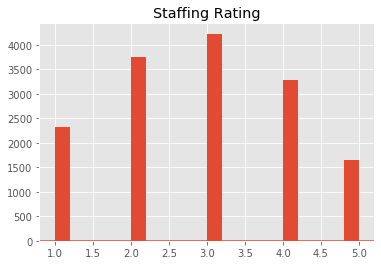

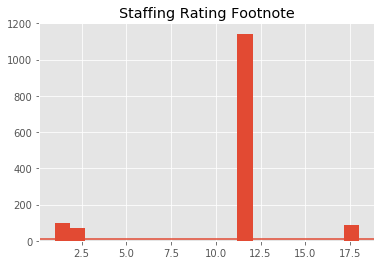

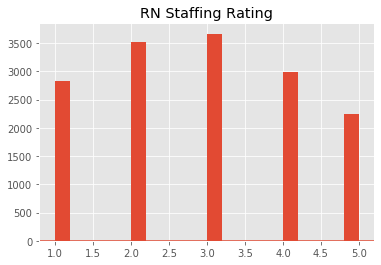

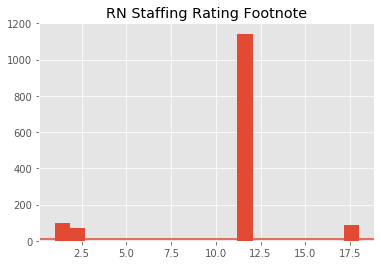

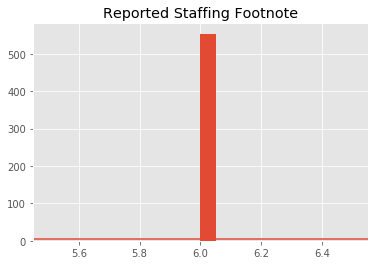

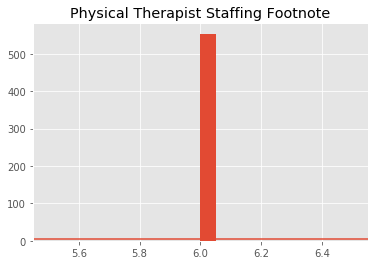

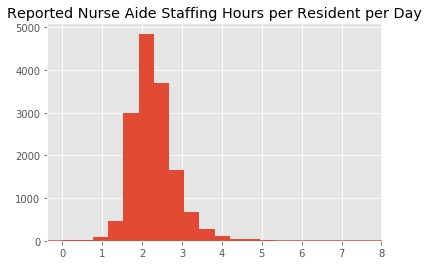

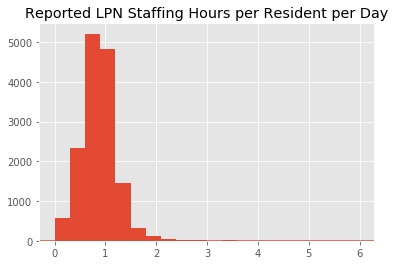

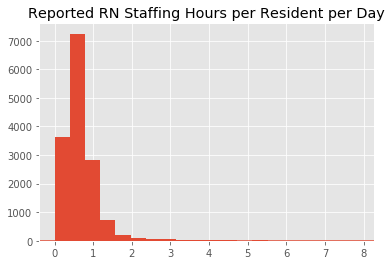

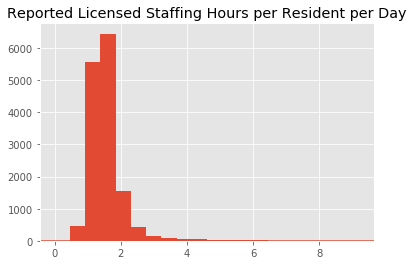

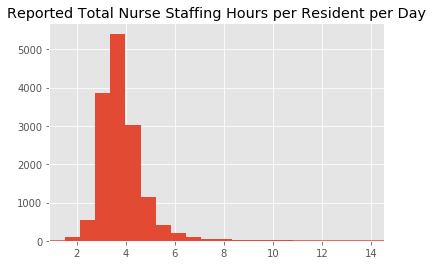

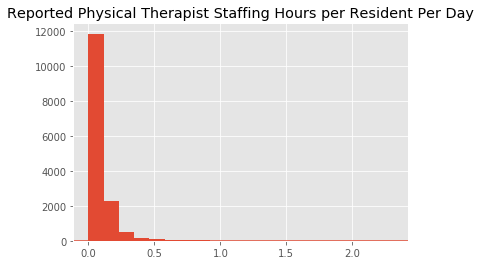

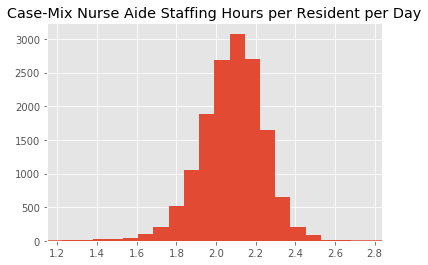

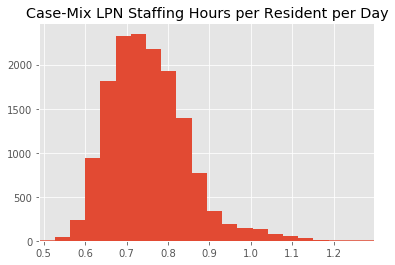

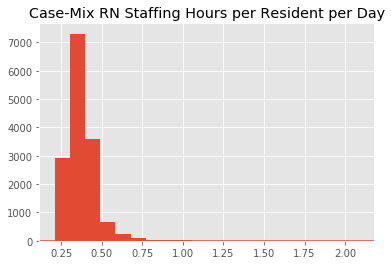

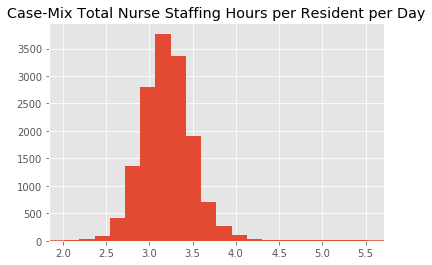

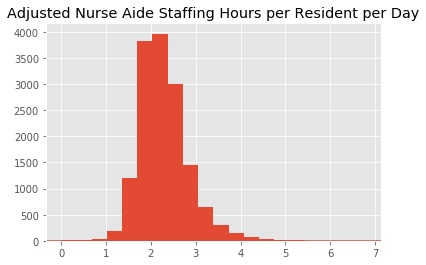

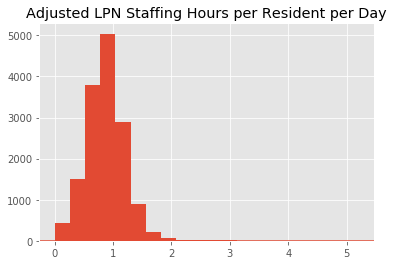

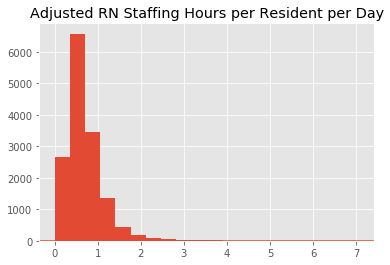

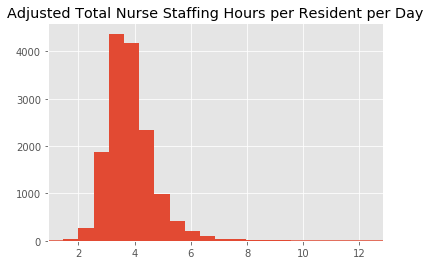

In [249]:
#Create a new database with only staffing features

staffing_cols = [i for i in list(df_import.columns) if 'Staffing' in i]
#print(staffing_cols)
staffing_df = df_import.loc[:,  df_import.columns.isin(staffing_cols)]

staffing_df.head(1)

#Histogram of all staffing columns
for i in staffing_cols:
    cols = staffing_df[i]
    fig, ax = plt.subplots()
    ax.set_title(i)
    ax.hist(cols, bins=20)
    ax.axhline(np.mean(cols))

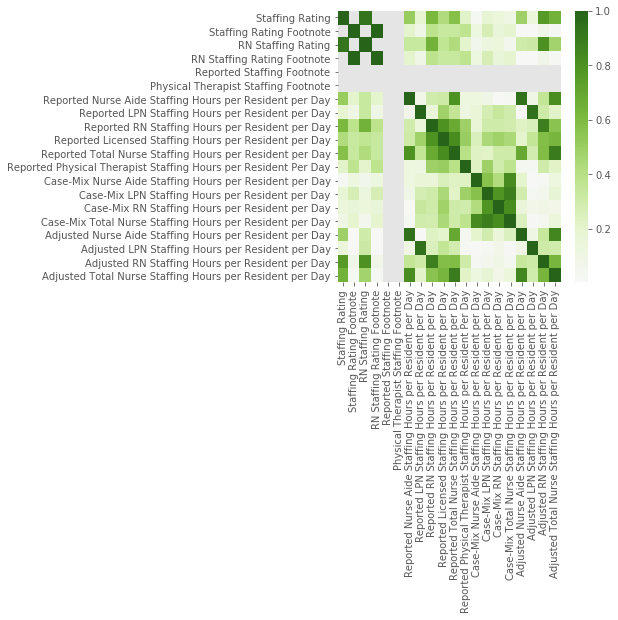

In [277]:
plt.figure(figsize=(5,5))
sns.heatmap(abs(staffing_df.corr()), cmap="PiYG", annot=False, center=0);


In [202]:
#Create a new database with only important staffing features

staffing_df = df_import.loc[:, ['Provider Name', 'Staffing Rating','Adjusted Total Nurse Staffing Hours per Resident per Day']]

staffing_df.head(5)

,Provider Name,Staffing Rating,Adjusted Total Nurse Staffing Hours per Resident per Day
0,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,3.0,3.51011
1,SUMMERFORD NURSING HOME INC,3.0,3.43516
2,CLAY COUNTY NURSING HOME,NaN,NaN
3,HENDRIX HEALTH AND REHABILITATION,2.0,3.26946
4,"LINEVILLE HEALTH AND REHABILITATION, LLC",3.0,4.18192


### Health Inspection Breakdown 

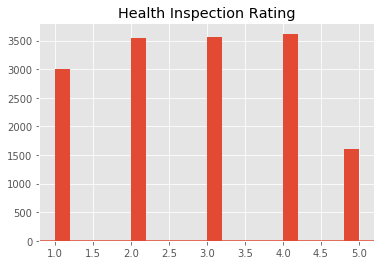

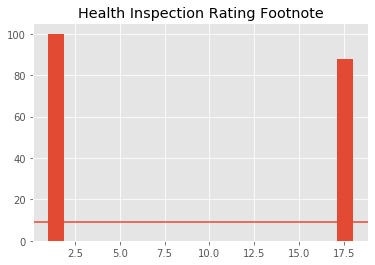

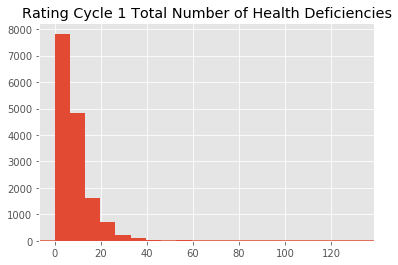

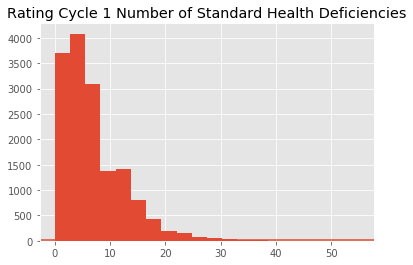

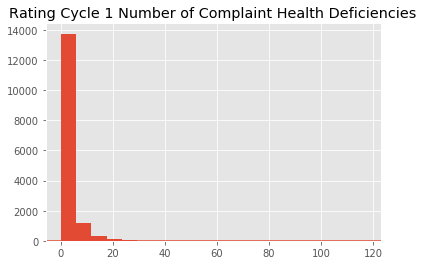

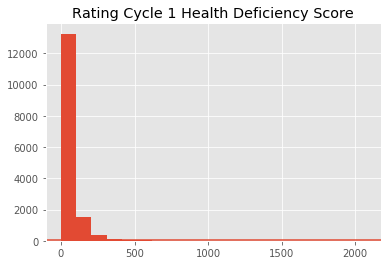

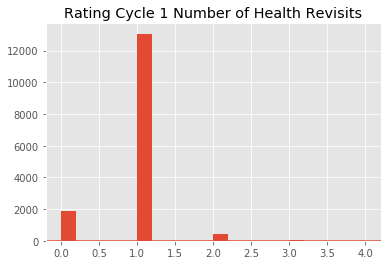

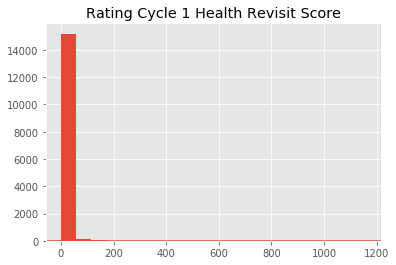

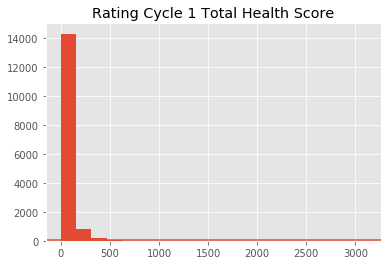

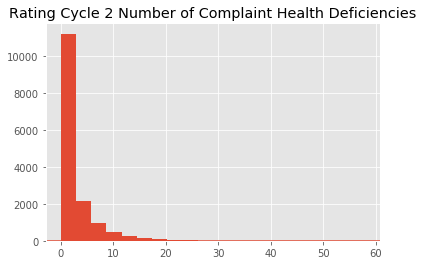

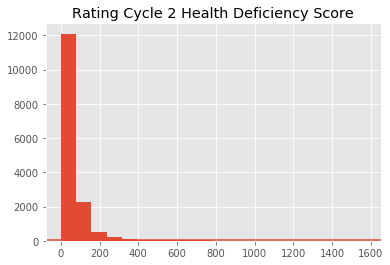

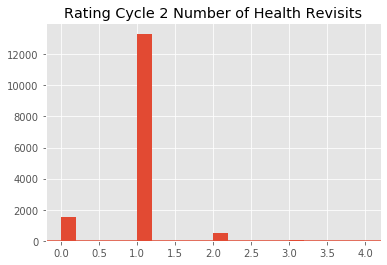

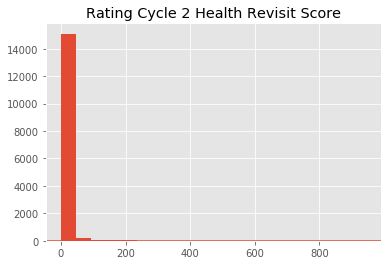

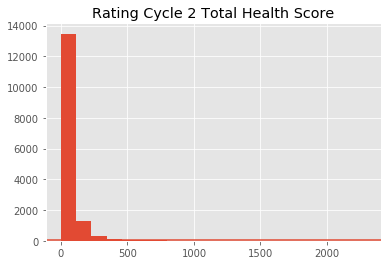

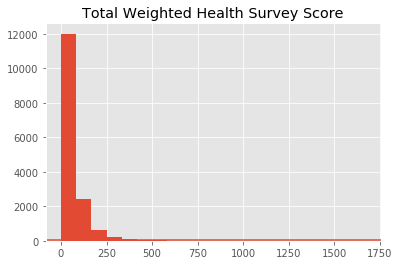

In [174]:
#Create a new database with only health inspection features

inspection_cols = [i for i in list(df_import) if 'Health' in i]
#print(inspection_cols)
inspection_df = df_import.loc[:,  df_import.columns.isin(inspection_cols)]
inspection_replace = inspection_df.applymap(lambda x: 0 if x=="." else x)
inspection_replace



inspection_replace.dtypes

#change data types
inspection_replace['Rating Cycle 2 Number of Standard Health Deficiencies'] = pd.to_numeric(inspection_replace['Rating Cycle 2 Number of Standard Health Deficiencies'])
inspection_replace['Rating Cycle 2 Total Number of Health Deficiencies'] = pd.to_numeric(inspection_replace['Rating Cycle 2 Total Number of Health Deficiencies'])
inspection_replace['Rating Cycle 3 Total Number of Health Deficiencies'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Total Number of Health Deficiencies'])
inspection_replace['Rating Cycle 3 Number of Standard Health Deficiencies'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Number of Standard Health Deficiencies'])
inspection_replace['Rating Cycle 3 Number of Health Revisits'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Number of Health Revisits'])
inspection_replace['Rating Cycle 3 Number of Complaint Health Deficiencies'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Number of Complaint Health Deficiencies'])
inspection_replace['Rating Cycle 3 Health Deficiency Score'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Health Deficiency Score'])
inspection_replace['Rating Cycle 3 Health Revisit Score'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Health Revisit Score'])
inspection_replace['Rating Cycle 3 Total Health Score'] = pd.to_numeric(inspection_replace['Rating Cycle 3 Total Health Score'])



#Histogram of all staffing columns
for i in inspection_replace.select_dtypes(include=['float64']):
    cols = inspection_replace[i]
    fig, ax = plt.subplots()
    ax.set_title(i)
    ax.hist(cols, bins=20)
    ax.axhline(np.mean(cols))


        

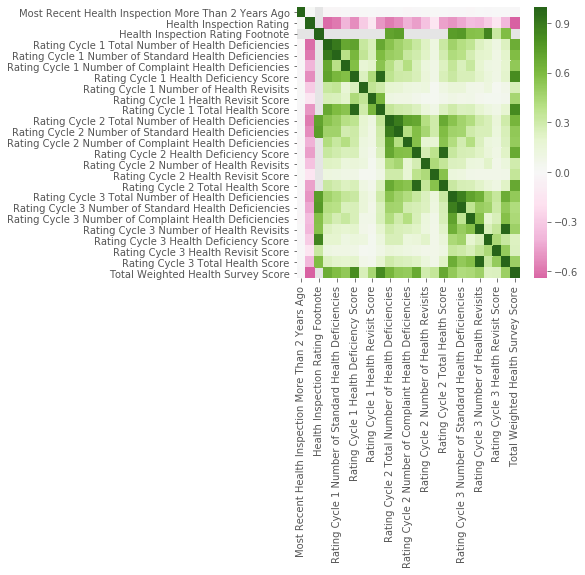

In [291]:
plt.figure(figsize=(5,5))
sns.heatmap(inspection_replace.corr(), cmap="PiYG", annot=False, center=0);

In [288]:
#Create a new database with only health inspection features

health_df = df_import.loc[:, ['Provider Name', 'Health Inspection Rating','Total Weighted Health Survey Score']]

health_df.head()


,Provider Name,Health Inspection Rating,Total Weighted Health Survey Score
0,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,1.0,291.667
1,SUMMERFORD NURSING HOME INC,1.0,72.167
2,CLAY COUNTY NURSING HOME,3.0,20.667
3,HENDRIX HEALTH AND REHABILITATION,3.0,18.667
4,"LINEVILLE HEALTH AND REHABILITATION, LLC",4.0,14.000


### Which Data Matters?

Create a dataset of the columns that I want to do analysis on and do analysis.

In [238]:
merged_df = df_import.loc[:, ['Provider Name', 'QM Rating', 
                              'Adjusted Total Nurse Staffing Hours per Resident per Day', 
                              'Total Weighted Health Survey Score']].dropna(axis=0)

#drop null values- Total 14,795 rows now

merged_df.head()

,Provider Name,QM Rating,Adjusted Total Nurse Staffing Hours per Resident per Day,Total Weighted Health Survey Score
0,MERRY WOOD LODGE CARE AND REHABILITATION CENTER,1.0,3.51011,291.667
1,SUMMERFORD NURSING HOME INC,3.0,3.43516,72.167
3,HENDRIX HEALTH AND REHABILITATION,4.0,3.26946,18.667
4,"LINEVILLE HEALTH AND REHABILITATION, LLC",4.0,4.18192,14.000
5,ALBERTVILLE NURSING HOME,3.0,5.09200,14.000


In [252]:
staffing = merged_df['Adjusted Total Nurse Staffing Hours per Resident per Day']
health = merged_df['Total Weighted Health Survey Score']
QM = merged_df['QM Rating']

#### Distributions of Important Data

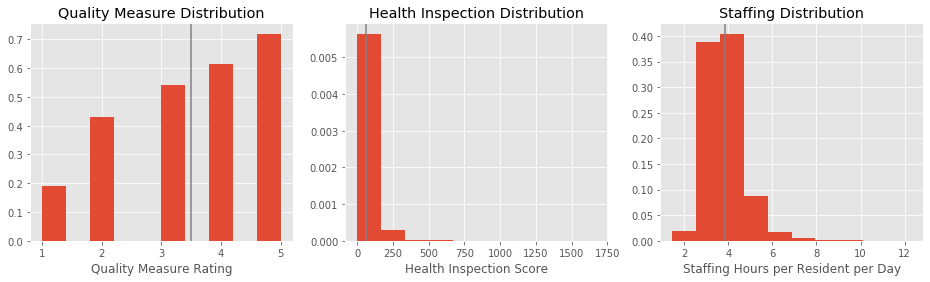

In [344]:
fig, ax = plt.subplots(1,3, figsize=(16,4))


ax[0].set_title('Quality Measure Distribution')
ax[0].hist(QM, density=True)
ax[0].set_xlabel('Quality Measure Rating')
ax[0].axvline(np.mean(QM), color='grey')


ax[1].set_title('Health Inspection Distribution')
ax[1].hist(health, density=True)
ax[1].set_xlabel('Health Inspection Score')
ax[1].axvline(np.mean(health), color='grey')


ax[2].set_title('Staffing Distribution')
ax[2].hist(staffing, density=True)
ax[2].set_xlabel('Staffing Hours per Resident per Day')
ax[2].axvline(np.mean(staffing), color='grey')

plt.savefig('images/rating_distributions.png')

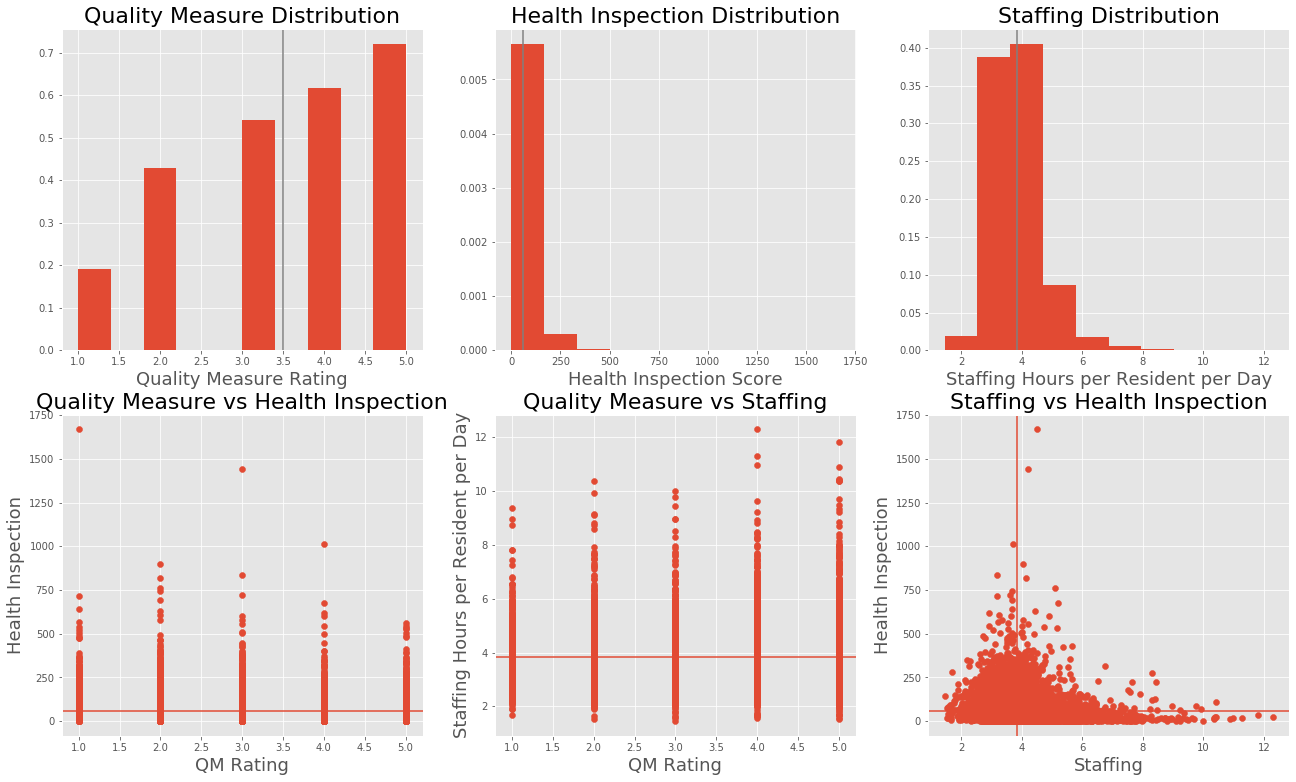

In [373]:
## FOR README
fig, ax = plt.subplots(2,3, figsize=(22,13))


ax[0,0].set_title('Quality Measure Distribution', fontsize=22)
ax[0,0].hist(QM, density=True)
ax[0,0].set_xlabel('Quality Measure Rating', fontsize=18)
ax[0,0].axvline(np.mean(QM), color='grey')


ax[0,1].set_title('Health Inspection Distribution', fontsize=22)
ax[0,1].hist(health, density=True)
ax[0,1].set_xlabel('Health Inspection Score', fontsize=18)
ax[0,1].axvline(np.mean(health), color='grey')


ax[0,2].set_title('Staffing Distribution', fontsize=22)
ax[0,2].hist(staffing, density=True)
ax[0,2].set_xlabel('Staffing Hours per Resident per Day', fontsize=18)
ax[0,2].axvline(np.mean(staffing), color='grey')

ax[1,0].set_title('Quality Measure vs Health Inspection', fontsize=22)
ax[1,0].scatter(QM, health)
ax[1,0].axhline(np.mean(health))
ax[1,0].set_xlabel('QM Rating', fontsize=18)
ax[1,0].set_ylabel('Health Inspection', fontsize=18)
    

ax[1,1].set_title('Quality Measure vs Staffing', fontsize=22)
ax[1,1].scatter(QM, staffing)
ax[1,1].axhline(np.mean(staffing))
ax[1,1].set_xlabel('QM Rating', fontsize=18)
ax[1,1].set_ylabel('Staffing Hours per Resident per Day', fontsize=18)


ax[1,2].set_title('Staffing vs Health Inspection', fontsize=22)
ax[1,2].scatter(staffing, health)
ax[1,2].axvline(np.mean(staffing))
ax[1,2].axhline(np.mean(health))
ax[1,2].set_xlabel('Staffing', fontsize=18)
ax[1,2].set_ylabel('Health Inspection', fontsize=18)


plt.savefig('images/EDA.png')

Only Staffing distribution looks normal, will have to use u-test for p-value

#### Quality Measures vs Staffing and Health Inspection

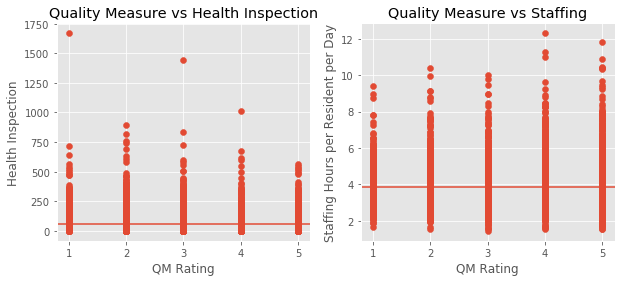

In [329]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].set_title('Quality Measure vs Health Inspection')
ax[0].scatter(QM, health)
ax[0].axhline(np.mean(health))
ax[0].set_xlabel('QM Rating')
ax[0].set_ylabel('Health Inspection')
    

ax[1].set_title('Quality Measure vs Staffing')
ax[1].scatter(QM, staffing)
ax[1].axhline(np.mean(staffing))
ax[1].set_xlabel('QM Rating')
ax[1].set_ylabel('Staffing Hours per Resident per Day')

plt.savefig('images/QM_comparison.png')

#### Heat Maps of QM vs Staffing and Inspection

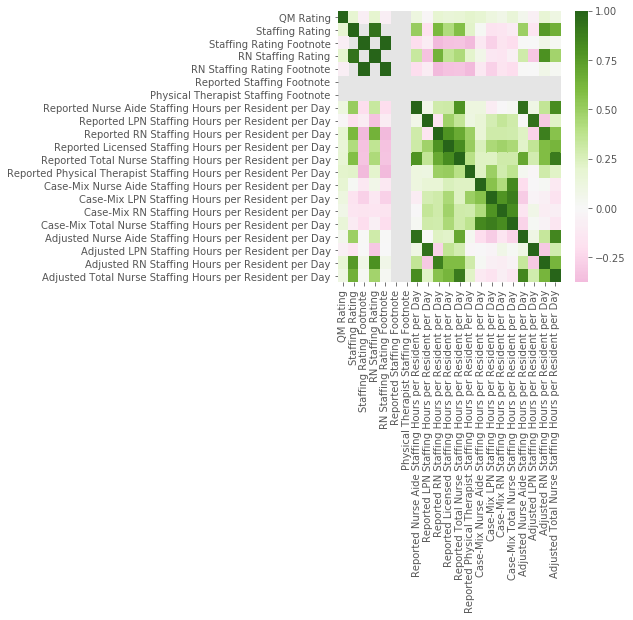

In [293]:
QM_staffing  = QM_df.join(staffing_df)
plt.figure(figsize=(5,5))
sns.heatmap(QM_staffing.corr(), cmap="PiYG", annot=False, center=0);

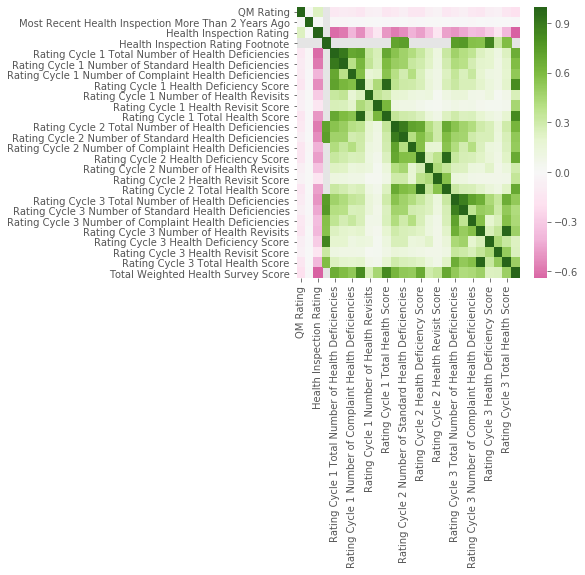

In [294]:
QM_inspection  = QM_df.join(inspection_replace)
plt.figure(figsize=(5,5))
sns.heatmap(QM_inspection.corr(), cmap="PiYG", annot=False, center=0);

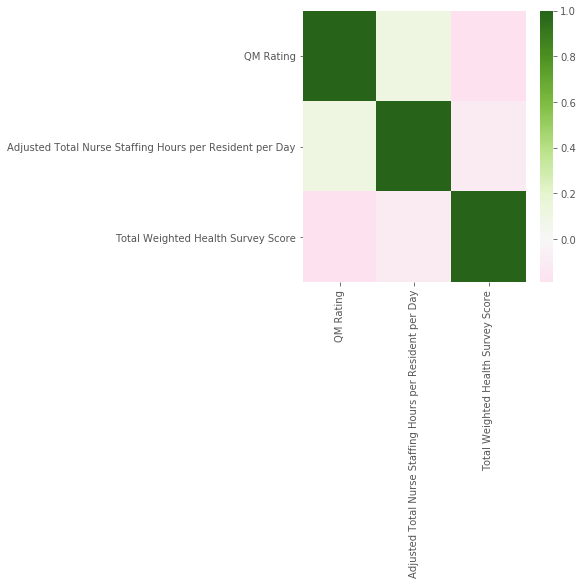

In [296]:
plt.figure(figsize=(5,5))
sns.heatmap(merged_df.corr(), cmap="PiYG", annot=False, center=0);

## Hypothesis Testing

Three different options:

1. Staffing vs Health Inspections
2. Quality vs Staffing
3. Quality vs Health Inspections

In [297]:
health_mean = np.mean((health))
staffing_mean = np.mean(staffing)
QM_mean = np.mean(QM)

print('Health Mean = {}\nStaffing Mean = {}\nQM Mean = {}'.format(health_mean, staffing_mean, QM_mean))

Health Mean = 59.87699682325099
Staffing Mean = 3.8522042250760484
QM Mean = 3.4967894558972628


### Staffing vs Health Inspections

h0 = There is no correlation between staffing and health inspections

h1 = There is a correlation between staffing and health inspections

In [303]:
p_value = stats.mannwhitneyu(staffing, health, alternative='greater')
print('p_value for Staffing vs Health Inspection = {}'.format(p_value[1]))

p_value for Staffing vs Health Inspection = 1.0


### Quality vs Staffing

h0 = There is no correlation between staffing and quality

h1 = There is a correlation between staffing and quality

In [305]:
def combos(drop_na, alpha=.05):
    combos = list(combinations(pd.unique(QM), 2))

    results = pd.DataFrame()
    for rating1, rating2 in combos:
            combo = (rating1, rating2)
            rating_1 = drop_na[drop_na['QM Rating'] == rating1]['Adjusted Total Nurse Staffing Hours per Resident per Day']
            rating_2 = drop_na[drop_na['QM Rating'] == rating2]['Adjusted Total Nurse Staffing Hours per Resident per Day']
            p_value = stats.mannwhitneyu(rating_1, rating_2, alternative='greater')[1]
            rating_1_mean = rating_1.mean()
            rating_2_mean = rating_2.mean()
            diff = rating_1_mean-rating_2_mean
            absolute_diff = abs(diff)
            results = results.append({ 'combo':combo,
            'rating_1':rating_1, 'rating_2':rating_2, 
            'rating_1_mean':rating_1_mean, 'rating_2_mean':rating_2_mean,
            'mean_diff':diff, 'absolute_mean_diff':absolute_diff, 'p_value':p_value},
            ignore_index=True)
            
    results = results[['combo','rating_1', 'rating_2', 
                    'rating_1_mean', 'rating_2_mean', 
                    'mean_diff', 'absolute_mean_diff', 'p_value']]
    return results



alpha = .05
results = combos(drop_na)
results

,combo,rating_1,rating_2,rating_1_mean,rating_2_mean,mean_diff,absolute_mean_diff,p_value
0,"(1.0, 3.0)",0 3.51011 19 4.15495 39 4.3...,1 3.43516 5 5.09200 7 4.1...,3.758897,3.774256,-0.015359,0.015359,7.998219e-01
1,"(1.0, 4.0)",0 3.51011 19 4.15495 39 4.3...,3 3.26946 4 4.18192 6 3.2...,3.758897,3.877238,-0.118342,0.118342,9.999965e-01
2,"(1.0, 2.0)",0 3.51011 19 4.15495 39 4.3...,9 5.31155 11 5.22628 17 3.8...,3.758897,3.730023,0.028873,0.028873,1.303672e-01
3,"(1.0, 5.0)",0 3.51011 19 4.15495 39 4.3...,10 4.31583 15 3.33000 23 ...,3.758897,3.987354,-0.228458,0.228458,1.000000e+00
4,"(3.0, 4.0)",1 3.43516 5 5.09200 7 4.1...,3 3.26946 4 4.18192 6 3.2...,3.774256,3.877238,-0.102983,0.102983,9.999998e-01
5,"(3.0, 2.0)",1 3.43516 5 5.09200 7 4.1...,9 5.31155 11 5.22628 17 3.8...,3.774256,3.730023,0.044232,0.044232,4.500997e-03
6,"(3.0, 5.0)",1 3.43516 5 5.09200 7 4.1...,10 4.31583 15 3.33000 23 ...,3.774256,3.987354,-0.213098,0.213098,1.000000e+00
7,"(4.0, 2.0)",3 3.26946 4 4.18192 6 3.2...,9 5.31155 11 5.22628 17 3.8...,3.877238,3.730023,0.147215,0.147215,7.061543e-14
8,"(4.0, 5.0)",3 3.26946 4 4.18192 6 3.2...,10 4.31583 15 3.33000 23 ...,3.877238,3.987354,-0.110116,0.110116,1.000000e+00
9,"(2.0, 5.0)",9 5.31155 11 5.22628 17 3.8...,10 4.31583 15 3.33000 23 ...,3.730023,3.987354,-0.257331,0.257331,1.000000e+00


In [140]:
results[results['p_value'] < alpha].sort_values('absolute_mean_diff', ascending=False)

,combo,rating_1,rating_2,rating_1_mean,rating_2_mean,mean_diff,absolute_mean_diff,p_value
7,"(4.0, 2.0)",3 3.26946 4 4.18192 6 3.2...,9 5.31155 11 5.22628 17 3.8...,3.877238,3.730023,0.147215,0.147215,7.061543e-14
5,"(3.0, 2.0)",1 3.43516 5 5.09200 7 4.1...,9 5.31155 11 5.22628 17 3.8...,3.774256,3.730023,0.044232,0.044232,4.500997e-03


In [141]:
results[results['p_value'] > alpha].sort_values('absolute_mean_diff', ascending=False)

,combo,rating_1,rating_2,rating_1_mean,rating_2_mean,mean_diff,absolute_mean_diff,p_value
9,"(2.0, 5.0)",9 5.31155 11 5.22628 17 3.8...,10 4.31583 15 3.33000 23 ...,3.730023,3.987354,-0.257331,0.257331,1.000000
3,"(1.0, 5.0)",0 3.51011 19 4.15495 39 4.3...,10 4.31583 15 3.33000 23 ...,3.758897,3.987354,-0.228458,0.228458,1.000000
6,"(3.0, 5.0)",1 3.43516 5 5.09200 7 4.1...,10 4.31583 15 3.33000 23 ...,3.774256,3.987354,-0.213098,0.213098,1.000000
1,"(1.0, 4.0)",0 3.51011 19 4.15495 39 4.3...,3 3.26946 4 4.18192 6 3.2...,3.758897,3.877238,-0.118342,0.118342,0.999996
8,"(4.0, 5.0)",3 3.26946 4 4.18192 6 3.2...,10 4.31583 15 3.33000 23 ...,3.877238,3.987354,-0.110116,0.110116,1.000000
4,"(3.0, 4.0)",1 3.43516 5 5.09200 7 4.1...,3 3.26946 4 4.18192 6 3.2...,3.774256,3.877238,-0.102983,0.102983,1.000000
2,"(1.0, 2.0)",0 3.51011 19 4.15495 39 4.3...,9 5.31155 11 5.22628 17 3.8...,3.758897,3.730023,0.028873,0.028873,0.130367
0,"(1.0, 3.0)",0 3.51011 19 4.15495 39 4.3...,1 3.43516 5 5.09200 7 4.1...,3.758897,3.774256,-0.015359,0.015359,0.799822


### Quality vs Health Inspection

h0 = There is no correlation between health inspections and quality measures

h1 = There is a correlation between health inspections and quality measures

In [184]:
from itertools import combinations


def combos(drop_na, alpha=.05):
    combos = list(combinations(pd.unique(QM), 2))

    results = pd.DataFrame()
    for rating1, rating2 in combos:
            combo = (rating1, rating2)
            rating_1 = drop_na[drop_na['QM Rating'] == rating1]['Total Weighted Health Survey Score']
            rating_2 = drop_na[drop_na['QM Rating'] == rating2]['Total Weighted Health Survey Score']
            p_value = stats.mannwhitneyu(rating_1, rating_2, alternative='greater')[1]
            rating_1_mean = rating_1.mean()
            rating_2_mean = rating_2.mean()
            diff = rating_1_mean-rating_2_mean
            absolute_diff = abs(diff)
            results = results.append({ 'combo':combo,
            'rating_1':rating_1, 'rating_2':rating_2, 
            'rating_1_mean':rating_1_mean, 'rating_2_mean':rating_2_mean,
            'mean_diff':diff, 'absolute_mean_diff':absolute_diff, 'p_value':p_value},
            ignore_index=True)
            
    results = results[['combo','rating_1', 'rating_2', 
                    'rating_1_mean', 'rating_2_mean', 
                    'mean_diff', 'absolute_mean_diff', 'p_value']]
    return results



alpha = .05
results = combos(drop_na)
results

,combo,rating_1,rating_2,rating_1_mean,rating_2_mean,mean_diff,absolute_mean_diff,p_value
0,"(1.0, 3.0)",0 291.667 19 33.333 39 16...,1 72.167 5 14.000 7 22...,85.186727,63.845718,21.341009,21.341009,2.786981e-16
1,"(1.0, 4.0)",0 291.667 19 33.333 39 16...,3 18.667 4 14.000 6 40...,85.186727,53.844047,31.342680,31.342680,6.351988e-36
2,"(1.0, 2.0)",0 291.667 19 33.333 39 16...,9 15.333 11 44.167 17 13...,85.186727,75.614390,9.572337,9.572337,7.730471e-04
3,"(1.0, 5.0)",0 291.667 19 33.333 39 16...,10 13.333 15 12.000 23 6...,85.186727,45.905288,39.281440,39.281440,1.515670e-70
4,"(3.0, 4.0)",1 72.167 5 14.000 7 22...,3 18.667 4 14.000 6 40...,63.845718,53.844047,10.001671,10.001671,5.022562e-10
5,"(3.0, 2.0)",1 72.167 5 14.000 7 22...,9 15.333 11 44.167 17 13...,63.845718,75.614390,-11.768672,11.768672,1.000000e+00
6,"(3.0, 5.0)",1 72.167 5 14.000 7 22...,10 13.333 15 12.000 23 6...,63.845718,45.905288,17.940430,17.940430,3.026722e-46
7,"(4.0, 2.0)",3 18.667 4 14.000 6 40...,9 15.333 11 44.167 17 13...,53.844047,75.614390,-21.770343,21.770343,1.000000e+00
8,"(4.0, 5.0)",3 18.667 4 14.000 6 40...,10 13.333 15 12.000 23 6...,53.844047,45.905288,7.938760,7.938760,1.216285e-17
9,"(2.0, 5.0)",9 15.333 11 44.167 17 13...,10 13.333 15 12.000 23 6...,75.614390,45.905288,29.709103,29.709103,5.974555e-84


In [185]:
results[results['p_value'] < alpha].sort_values('absolute_mean_diff', ascending=False)

,combo,rating_1,rating_2,rating_1_mean,rating_2_mean,mean_diff,absolute_mean_diff,p_value
3,"(1.0, 5.0)",0 291.667 19 33.333 39 16...,10 13.333 15 12.000 23 6...,85.186727,45.905288,39.281440,39.281440,1.515670e-70
1,"(1.0, 4.0)",0 291.667 19 33.333 39 16...,3 18.667 4 14.000 6 40...,85.186727,53.844047,31.342680,31.342680,6.351988e-36
9,"(2.0, 5.0)",9 15.333 11 44.167 17 13...,10 13.333 15 12.000 23 6...,75.614390,45.905288,29.709103,29.709103,5.974555e-84
0,"(1.0, 3.0)",0 291.667 19 33.333 39 16...,1 72.167 5 14.000 7 22...,85.186727,63.845718,21.341009,21.341009,2.786981e-16
6,"(3.0, 5.0)",1 72.167 5 14.000 7 22...,10 13.333 15 12.000 23 6...,63.845718,45.905288,17.940430,17.940430,3.026722e-46
4,"(3.0, 4.0)",1 72.167 5 14.000 7 22...,3 18.667 4 14.000 6 40...,63.845718,53.844047,10.001671,10.001671,5.022562e-10
2,"(1.0, 2.0)",0 291.667 19 33.333 39 16...,9 15.333 11 44.167 17 13...,85.186727,75.614390,9.572337,9.572337,7.730471e-04
8,"(4.0, 5.0)",3 18.667 4 14.000 6 40...,10 13.333 15 12.000 23 6...,53.844047,45.905288,7.938760,7.938760,1.216285e-17


In [186]:
results[results['p_value'] > alpha].sort_values('absolute_mean_diff', ascending=False)

,combo,rating_1,rating_2,rating_1_mean,rating_2_mean,mean_diff,absolute_mean_diff,p_value
7,"(4.0, 2.0)",3 18.667 4 14.000 6 40...,9 15.333 11 44.167 17 13...,53.844047,75.61439,-21.770343,21.770343,1.0
5,"(3.0, 2.0)",1 72.167 5 14.000 7 22...,9 15.333 11 44.167 17 13...,63.845718,75.61439,-11.768672,11.768672,1.0


SyntaxError: invalid syntax (<ipython-input-307-8b80f7db9359>, line 1)